In [115]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
df = pd.read_csv("bank.csv",skiprows=0,delimiter=";")



In [117]:
df2 = pd.DataFrame(columns=['y', 'job', 'marital','default', 'housing','poutcome'])
for col in df2.columns:
    df2[col] =df[col]
df2

,y,job,marital,default,housing,poutcome
0,no,unemployed,married,no,no,unknown
1,no,services,married,no,yes,failure
2,no,management,single,no,yes,failure
3,no,management,married,no,yes,unknown
4,no,blue-collar,married,no,yes,unknown
...,...,...,...,...,...,...
4516,no,services,married,no,yes,unknown
4517,no,self-employed,married,yes,yes,unknown
4518,no,technician,married,no,no,unknown
4519,no,blue-collar,married,no,no,other


In [118]:
df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])
df3

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,no,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
2,no,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
3,no,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,no,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4517,no,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4518,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4519,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0


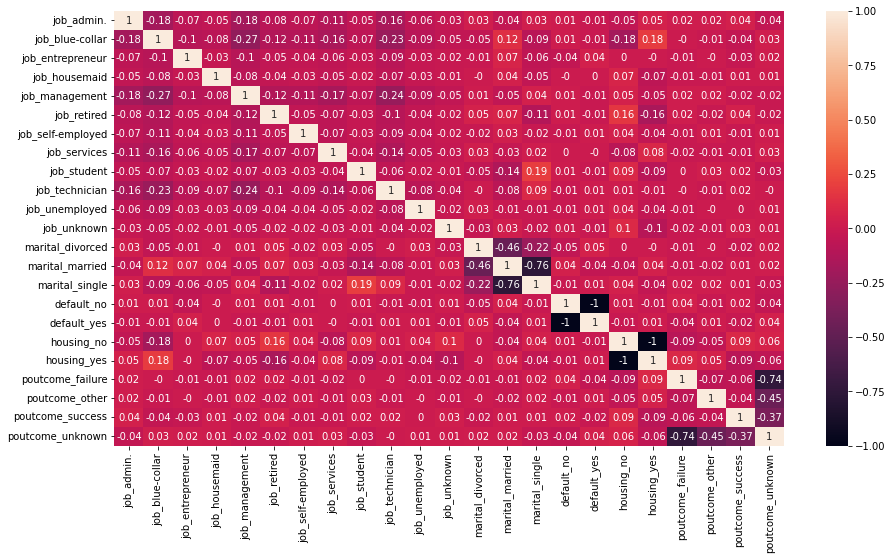

In [119]:
#Correlation

plt.figure(figsize = (15,8)) # set figure size for heatmap

sns.heatmap(data=df3.corr().round(2), annot=True)

plt.show()

In [146]:
#Pick variables and split

X = df3.iloc[:,1:] # input variables

y = df3['y'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

model = LogisticRegression()

model.fit(X_train, y_train)
X

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
4517,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4518,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
4519,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0


In [147]:
from sklearn.metrics import ConfusionMatrixDisplay


In [148]:
#Predict and evaluate

y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)#HOX! y_test and y_pred here

cnf_matrix


array([[984,  16],
       [111,  20]], dtype=int64)

C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


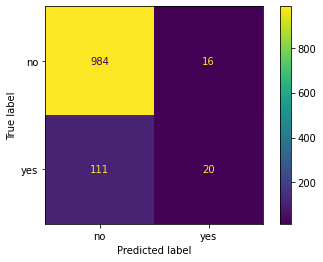

In [149]:
metrics.plot_confusion_matrix(model, X_test, y_test)#HOX! Model and X_test here instead y_pred!!!!

plt.show()

In [150]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='yes'))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label='yes'))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='no'))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label='no'))

Accuracy: 0.887709991158267
Precision: 0.5555555555555556
Recall: 0.15267175572519084
Precision: 0.8986301369863013
Recall: 0.984


In [151]:
from sklearn.neighbors import KNeighborsClassifier


In [152]:

classifier = KNeighborsClassifier(n_neighbors=5) #k=5 here

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


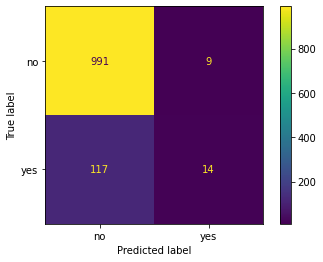

In [153]:
#Evaluate

metrics.plot_confusion_matrix(classifier, X_test, y_test)

plt.show()


In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.89      0.99      0.94      1000
         yes       0.61      0.11      0.18       131

    accuracy                           0.89      1131
   macro avg       0.75      0.55      0.56      1131
weighted avg       0.86      0.89      0.85      1131



In [155]:
y_test

2143    yes
3284     no
71       no
1311     no
3274     no
       ... 
198      no
4388    yes
4358     no
104      no
3945     no
Name: y, Length: 1131, dtype: object

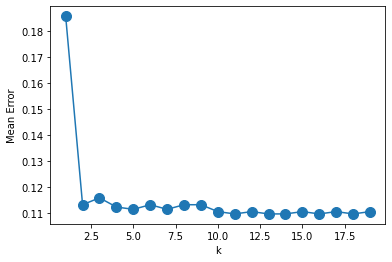

In [156]:
#Choice of k examined

error = []

for k in range(1, 20):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    error.append(np.mean(y_pred != y_test))

    

    

plt.plot(range(1, 20), error, marker='o', markersize=10)

plt.xlabel('k')

plt.ylabel('Mean Error')

plt.show()